In [1]:
# ------------------------------------------------------------------------
#
# TITLE - paper_fig1_data.ipynb
# AUTHOR - James Lane
# PROJECT - mw-dfs
#
# ------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Make the final DF paper figures that have to do with basic data
'''

__author__ = "James Lane"

In [2]:
### Imports

## Basic
import numpy as np, pdb, sys 
import dill as pickle
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import astropy.units as apu

## galpy scale
ro = 8.178 # Gravity 2019
vo = 220
zo = 0.0208 # Bennet + Bovy 2018

sys.path.append('../../src/')
from mw_dfs import plot as project_plot

# Setup colors
project_colors = project_plot.colors()
rainbow_cmap = project_colors.colourmap('rainbow')

In [3]:
### Notebook setup
%matplotlib inline
plt.style.use('../../src/mpl/project.mplstyle')
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [4]:
### Keywords

# Directories
fig_dir = './fig/'
data_dir = '/geir_data/scr/lane/projects/mw-dfs/data/data_Sept_2021/gaia_apogee_processed/'

# Figure sizing
columnwidth = 240./72.27
textwidth = 504.0/72.27

# Load data

In [6]:
## Load Gaia DR2, APOGEE allstar, 

# Halo
gaia2_halo = np.load(data_dir+'gaia_data_halo.npy', allow_pickle=True)
allstar_halo = np.load(data_dir+'allstar_halo.npy', allow_pickle=True)
with open(data_dir+'orbits_halo.pkl','rb') as f:
    os_halo = pickle.load(f)

# Thin disk
gaia2_thin = np.load(data_dir+'gaia_data_thin.npy', allow_pickle=True)
allstar_thin = np.load(data_dir+'allstar_thin.npy', allow_pickle=True)
with open(data_dir+'orbits_thin.pkl','rb') as f:
    os_thin = pickle.load(f)    

# Thick disk
gaia2_thick = np.load(data_dir+'gaia_data_thick.npy', allow_pickle=True)
allstar_thick = np.load(data_dir+'allstar_thick.npy', allow_pickle=True)
with open(data_dir+'orbits_thick.pkl','rb') as f:
    os_thick = pickle.load(f)
    
# All data
ecc_all = np.load(data_dir+'ecc_all.npy', allow_pickle=True)
allstar_all = np.load(data_dir+'allstar_all.npy', allow_pickle=True)
with open(data_dir+'orbits_all.pkl','rb') as f:
    os_all = pickle.load(f)
##wi

# Data figures

## Figure 1: Show the APOGEE sample in R-z and X-Y

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10



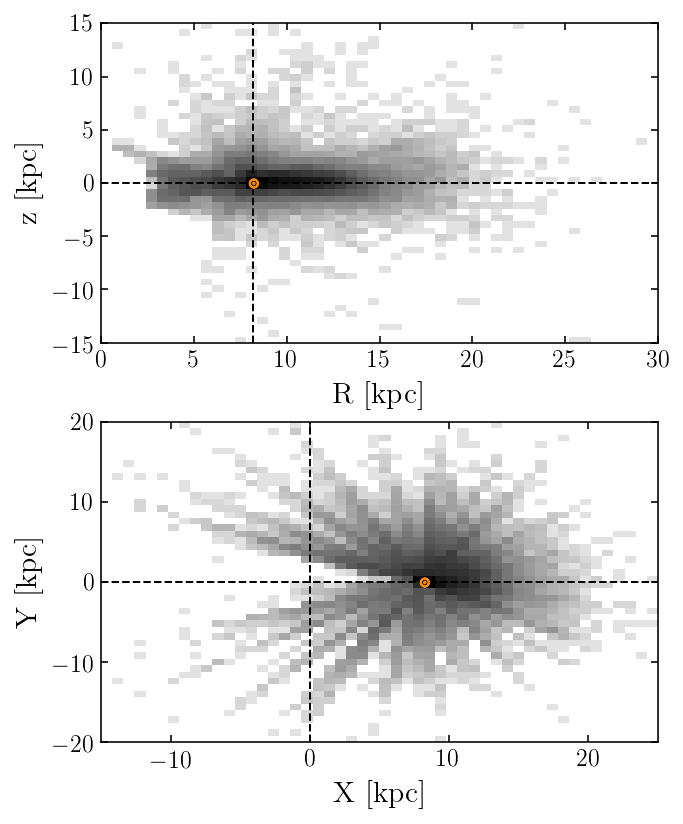

In [8]:
fig = plt.figure()
fig.set_size_inches(5,6)

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

n_bins = 50
R_lim = [0,30]
z_lim = [-15,15]
x_lim = [-15,25]
y_lim = [-20,20]

# Plot Gaia-APOGEE data in rectangular / cylindrical coordinates
h1,_,_ = np.histogram2d( os_all.R().value, os_all.z().value, bins=n_bins, range=[R_lim,z_lim] )
h2,_,_ = np.histogram2d( os_all.x().value, os_all.y().value, bins=n_bins, range=[x_lim,y_lim] )

ax1.imshow(np.log10(np.rot90(h1,k=1)), cmap='Greys', aspect='auto', vmin=-1, vmax=4, 
           extent=(R_lim[0],R_lim[1],z_lim[0],z_lim[1]) )
ax2.imshow(np.log10(np.rot90(h2,k=1)), cmap='Greys', aspect='auto', vmin=-1, vmax=4, 
           extent=(x_lim[0],x_lim[1],y_lim[0],y_lim[1]) )

# Lines
ax1.axhline(0, linestyle='dashed', color='Black', linewidth=1.,  zorder=5)
ax1.axvline(ro, linestyle='dashed', color='Black', linewidth=1., zorder=5)
ax2.axhline(0, linestyle='dashed', color='Black', linewidth=1.,  zorder=5)
ax2.axvline(0, linestyle='dashed', color='Black', linewidth=1.,  zorder=5)

# Mark the Sun
ax1.scatter(ro, 0, marker=r'$\odot$', s=20, color='DarkOrange', zorder=6)
ax2.scatter(ro, 0, marker=r'$\odot$', s=20, color='DarkOrange',  zorder=6)

ax1.set_xlim(R_lim)
ax1.set_ylim(z_lim)
ax1.set_xlabel('R [kpc]')
ax1.set_ylabel('z [kpc]')

ax2.set_xlim(x_lim)
ax2.set_ylim(y_lim)
ax2.set_xlabel('X [kpc]')
ax2.set_ylabel('Y [kpc]')

plt.tight_layout()
fig.subplots_adjust(hspace=0.25)
plt.savefig(fig_dir+'APOGEEGalactocentricRzXY.pdf',dpi=400,rasterized=True)

## Figure 2: Show the abundances of APOGEE stars

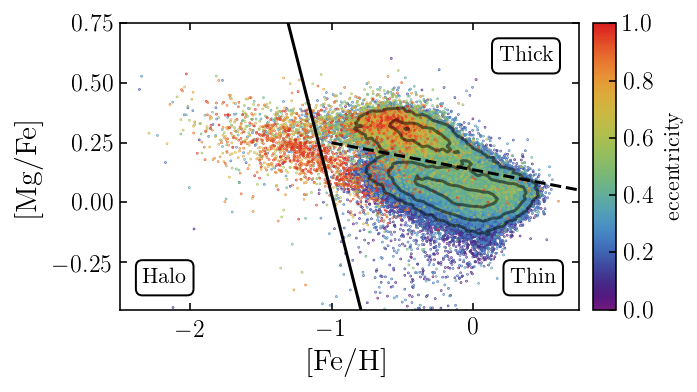

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(5,3)

nbins = 100
xlim = (-2.5,1.0)
ylim = (-0.5,0.7)

# Plot with eccentricity coloring
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ecc_sort = np.argsort(ecc_all)
pts = ax.scatter(allstar_all['FE_H'][ecc_sort], allstar_all['MG_FE'][ecc_sort], s=0.1, alpha=1, 
                     c=ecc_all[ecc_sort], cmap=rainbow_cmap, vmin=0., vmax=1., rasterized=True)
cbar = fig.colorbar(pts, cax=cax, orientation='vertical', pad=0.2)
cbar.set_label('eccentricity', fontsize=11)

# Overlay density
xbinsize = (xlim[1]-xlim[0])/nbins
ybinsize = (ylim[1]-ylim[0])/nbins
hist,xedge,yedge = np.histogram2d(allstar_all['FE_H'],allstar_all['MG_FE'],bins=nbins,
                                  range=[[xlim[0]-xbinsize,xlim[1]+xbinsize],
                                         [ylim[0]-ybinsize,ylim[1]+ybinsize]])
xcents = xedge[:-1] + (xlim[1]-xlim[0])/nbins
ycents = yedge[:-1] + (ylim[1]-ylim[0])/nbins
xcnt,ycnt = np.meshgrid(xcents,ycents)
ax.contour(xcnt, ycnt, hist.T, colors='Black', levels=[20,100,500], zorder=5, 
            alpha=0.5)

# Halo, thin, thick disk separators
halo_x = [-1.2,-0.9]
halo_y = [0.5,-0.2]
disk_x = [-1.0,0.5] 
disk_y = [0.25,0.08]

m_halo, b_halo = project_plot.get_params_from_line(halo_x, halo_y)
m_disk, b_disk = project_plot.get_params_from_line(disk_x, disk_y)
disk_x_start = disk_x[0]

ax.set_xlabel(r'[Fe/H]')
ax.set_ylabel(r'[Mg/Fe]')
ax.set_ylim(-0.45,0.75)
ax.set_xlim(-2.5,0.75)

plot_halo_x = np.linspace(xlim[0],xlim[1],2)
plot_halo_y = project_plot.line_equation(plot_halo_x, m_halo, b_halo)
plot_disk_x = np.linspace(disk_x_start,xlim[1],2)
plot_disk_y = project_plot.line_equation(plot_disk_x, m_disk, b_disk)

ax.plot(plot_halo_x, plot_halo_y, color='Black', linestyle='solid', rasterized=True)
ax.plot(plot_disk_x, plot_disk_y, color='Black', linestyle='dashed', rasterized=True)

bbox_props = {'boxstyle':'round', 'facecolor':'White', 'alpha':1.0}
bbox_text = ['Halo','Thin','Thick']
bbox_locs = [[0.05,0.15],[0.85,0.15],[0.825,0.925]]
for i in range(len(bbox_text)):
    ax.text(bbox_locs[i][0], bbox_locs[i][1], bbox_text[i], transform=ax.transAxes, 
                fontsize=11, verticalalignment='top', bbox=bbox_props, rasterized=True )
###i

fig.tight_layout()
fig.subplots_adjust(hspace=0.25)
fig.savefig(fig_dir+'APOGEEDR16HaloDiscALPHAFE.pdf', dpi=300, rasterized=True)